COVID - 19, TIME_SERIES OF DEATHS dataframe

In [ ]:
import pandas as pd
pd.read_csv("https://storage.googleapis.com/files.mobibootcamp.com/2020-datafiles/time_series_covid19_deaths_US.csv")

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,30,30,31,32,32,32,32,32,33,34,35,36,36,38,38,38,40,42,42,42,42,42,42,42,43,43,43,43,43,47,48,48,49,49,49
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,6,6,6,6,6,6,5,5,5,6,6,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,10,10,10,10
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,6,6,6,6,6,7,7,9,9,10,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,29,33,33,36,36,36,36,36,36,36,36,36,36,36,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


Importing Libraries

In [ ]:
# importing libraries 

import numpy as np      
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
from functools import reduce
import calendar

Reading Data -
The dataframe represents the Deaths occurred in United States due to COVID-19 from the time period of January to September.

Glancing at data, it can be observed that data is not ready in form using it. The columns currently present in data is 256.

In [ ]:
# read data
covid_deaths_us = pd.read_csv("https://storage.googleapis.com/files.mobibootcamp.com/2020-datafiles/time_series_covid19_deaths_US.csv")
covid_deaths_us.head()


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,30,30,31,32,32,32,32,32,33,34,35,36,36,38,38,38,40,42,42,42,42,42,42,42,43,43,43,43,43,47,48,48,49,49,49
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,6,6,6,6,6,6,5,5,5,6,6,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,10,10,10,10
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,6,6,6,6,6,7,7,9,9,10,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,14,14,14,14


In [ ]:
#checking for any null values in dataset
covid_deaths_us.isnull().sum()

UID         0
iso2        0
iso3        0
code3       0
FIPS       10
           ..
9/17/20     0
9/18/20     0
9/19/20     0
9/20/20     0
9/21/20     0
Length: 256, dtype: int64

In [ ]:
## replacing missing values with 0
#covid_deaths_us['FIPS'] = covid_deaths_us['FIPS'].replace(np.nan,0)
#covid_deaths_us.isnull().sum()

Checking the Datatype for the given dataframe


In [ ]:
# checking for datatypes
covid_deaths_us.info()
type(covid_deaths_us)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Columns: 256 entries, UID to 9/21/20
dtypes: float64(3), int64(247), object(6)
memory usage: 6.5+ MB


pandas.core.frame.DataFrame

Finding the number of elements in each dimension

In [ ]:
covid_deaths_us.shape

(3340, 256)

Observing the Dataframe, it can be noted that the column names such as 'FIPS' and 'Admin2' are not clearly understandable. Hence, renaming the column names to understandable names as 'Fedaral_no' and 'County'

In [ ]:
covid_deaths_us = covid_deaths_us.rename(columns={"FIPS":"Fedaral_no", "Admin2":"County"})

In [ ]:
covid_deaths_us.head()

,UID,iso2,iso3,code3,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",55869,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",223234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29,29,29,29,29,30,30,31,32,32,32,32,32,33,34,35,36,36,38,38,38,40,42,42,42,42,42,42,42,43,43,43,43,43,47,48,48,49,49,49
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",24686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",22394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,6,6,6,6,6,6,5,5,5,6,6,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,9,9,10,10,10,10
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",57826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,6,6,6,6,6,7,7,9,9,10,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,14,14,14,14


Observing from above dataframe, it can be noted that Dates are displayed as column name, a very odd data shape which makes plotting of Data visualization tedious.

Also, missing values, wrong datatypes are present and Covid-19 cases from cruise ships are also being reported in the dataframe


In [ ]:
# running columns
covid_deaths_us.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'Fedaral_no', 'County',
       'Province_State', 'Country_Region', 'Lat', 'Long_',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=256)

It can be noticed that, columns are all date from the 12th column and the date list is beign shown below

In [ ]:
covid_deaths_us.columns[12:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

Unpivoting the Dataframe, from current wide format to long format.
This is done by tranposing all the date columns into values by using melt().

The main settings for that is : 
using columns( 'UID', 'Fedaral_no', 'County', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Population') as identifier valraibles.

Unpivoting date columns as seen above, from column 12 with variable column 'Date' and value column 'Deaths'



In [ ]:
dates = covid_deaths_us.columns[12:]
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/12/20', '9/13/20', '9/14/20', '9/15/20', '9/16/20', '9/17/20',
       '9/18/20', '9/19/20', '9/20/20', '9/21/20'],
      dtype='object', length=244)

In [ ]:
deaths_df_long = covid_deaths_us.melt( id_vars = ['UID', 'Fedaral_no', 'County', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Population'],
                                      value_vars = dates,
                                      var_name = 'Date',
                                      value_name = 'Deaths')

Oberving the Dataframe below, it can be noted that the columns are now reduced to ten columns.

In [ ]:
deaths_df_long.shape

(814960, 10)

In [ ]:
deaths_df_long

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
0,84001001,1001.0,Autauga,Alabama,US,32.539527,-86.644082,55869,1/22/20,0
1,84001003,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,223234,1/22/20,0
2,84001005,1005.0,Barbour,Alabama,US,31.868263,-85.387129,24686,1/22/20,0
3,84001007,1007.0,Bibb,Alabama,US,32.996421,-87.125115,22394,1/22/20,0
4,84001009,1009.0,Blount,Alabama,US,33.982109,-86.567906,57826,1/22/20,0
...,...,...,...,...,...,...,...,...,...,...
814955,84056039,56039.0,Teton,Wyoming,US,43.935225,-110.589080,23464,9/21/20,1
814956,84056041,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,20226,9/21/20,2
814957,84090056,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,0,9/21/20,0
814958,84056043,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,7805,9/21/20,6


Computing several descriptive statistics of the Dataframe

In [ ]:
#describing the data
deaths_df_long.describe()

,UID,Fedaral_no,Lat,Long_,Population,Deaths
count,8.149600e+05,812520.000000,814960.000000,814960.000000,8.149600e+05,814960.000000
mean,8.342958e+07,33061.684685,36.707212,-88.601474,9.966039e+04,25.868232
std,4.314702e+06,18636.153409,9.061570,21.715743,3.242065e+05,210.497225
min,1.600000e+01,60.000000,-14.271000,-174.159600,0.000000e+00,0.000000
25%,8.401811e+07,19079.000000,33.895587,-97.790204,9.928500e+03,0.000000
50%,8.402921e+07,31014.000000,38.002344,-89.486710,2.491100e+04,0.000000
75%,8.404612e+07,47131.000000,41.573069,-82.311265,6.499800e+04,4.000000
max,8.410000e+07,99999.000000,69.314792,145.673900,1.003911e+07,7318.000000


Performing the Data Cleaning,
The date column is in string format, Converting from string to Datetime.

In [ ]:
#converting date from string to datetime
deaths_df_long['Date'] = pd.to_datetime(deaths_df_long['Date'])
deaths_df_long

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
0,84001001,1001.0,Autauga,Alabama,US,32.539527,-86.644082,55869,2020-01-22,0
1,84001003,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,223234,2020-01-22,0
2,84001005,1005.0,Barbour,Alabama,US,31.868263,-85.387129,24686,2020-01-22,0
3,84001007,1007.0,Bibb,Alabama,US,32.996421,-87.125115,22394,2020-01-22,0
4,84001009,1009.0,Blount,Alabama,US,33.982109,-86.567906,57826,2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...
814955,84056039,56039.0,Teton,Wyoming,US,43.935225,-110.589080,23464,2020-09-21,1
814956,84056041,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,20226,2020-09-21,2
814957,84090056,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,0,2020-09-21,0
814958,84056043,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,7805,2020-09-21,6


Performing the Data Cleaning,
The Dataframe is having null values. Replacing the missing value Nan.

In [ ]:
#Missing values
deaths_df_long.isnull().sum()

UID                  0
Fedaral_no        2440
County            1464
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Population           0
Date                 0
Deaths               0
dtype: int64

Viewing the missing value Nan, it can be noted that the missing values in county is from the Cruise ship.

In [ ]:
# viewing the null values
deaths_df_long[deaths_df_long.isnull().any(axis = 1)]

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
100,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,55641,2020-01-22,0
336,84088888,88888.0,NaN,Diamond Princess,US,0.000000,0.000000,0,2020-01-22,0
570,84099999,99999.0,NaN,Grand Princess,US,0.000000,0.000000,0,2020-01-22,0
571,316,66.0,NaN,Guam,US,13.444300,144.793700,164229,2020-01-22,0
1267,84070002,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,0,2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...
814598,84070017,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,0,2020-09-21,1
814599,84070018,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,0,2020-09-21,30
814602,84070019,NaN,TriCounty,Utah,US,40.124915,-109.517442,0,2020-09-21,2
814610,84070020,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,0,2020-09-21,29


In [ ]:
#removing Nan values
deaths_df_long = deaths_df_long[deaths_df_long['County'].notna()]

The Missing values in Fedaral_no is being ignored as it doesnt add value to the dataframe.

In [ ]:
deaths_df_long.isnull().sum()

UID                  0
Fedaral_no        2440
County               0
Province_State       0
Country_Region       0
Lat                  0
Long_                0
Population           0
Date                 0
Deaths               0
dtype: int64

Observing the Dataframe, it can be seen that the few coulmns is having inappropriate data.

In column 'Population', data is having value 'Zero' and County ' Unassigned' which is not a usefull data. Hence, removing them


In [ ]:
deaths_df_long

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
0,84001001,1001.0,Autauga,Alabama,US,32.539527,-86.644082,55869,2020-01-22,0
1,84001003,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,223234,2020-01-22,0
2,84001005,1005.0,Barbour,Alabama,US,31.868263,-85.387129,24686,2020-01-22,0
3,84001007,1007.0,Bibb,Alabama,US,32.996421,-87.125115,22394,2020-01-22,0
4,84001009,1009.0,Blount,Alabama,US,33.982109,-86.567906,57826,2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...
814955,84056039,56039.0,Teton,Wyoming,US,43.935225,-110.589080,23464,2020-09-21,1
814956,84056041,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,20226,2020-09-21,2
814957,84090056,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,0,2020-09-21,0
814958,84056043,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,7805,2020-09-21,6


In [ ]:
zeropopulation = deaths_df_long.loc[deaths_df_long['Population'] == 0]
zeropopulation

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
52,84080001,80001.0,Out of AL,Alabama,US,0.0,0.0,0,2020-01-22,0
64,84090001,90001.0,Unassigned,Alabama,US,0.0,0.0,0,2020-01-22,0
89,84080002,80002.0,Out of AK,Alaska,US,0.0,0.0,0,2020-01-22,0
95,84090002,90002.0,Unassigned,Alaska,US,0.0,0.0,0,2020-01-22,0
111,84080004,80004.0,Out of AZ,Arizona,US,0.0,0.0,0,2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...
814853,84090054,90054.0,Unassigned,West Virginia,US,0.0,0.0,0,2020-09-21,0
814905,84080055,80055.0,Out of WI,Wisconsin,US,0.0,0.0,0,2020-09-21,0
814924,84090055,90055.0,Unassigned,Wisconsin,US,0.0,0.0,0,2020-09-21,0
814949,84080056,80056.0,Out of WY,Wyoming,US,0.0,0.0,0,2020-09-21,0


In [ ]:
deaths_df_long.drop(zeropopulation.index, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
deaths_df_long

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
0,84001001,1001.0,Autauga,Alabama,US,32.539527,-86.644082,55869,2020-01-22,0
1,84001003,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,223234,2020-01-22,0
2,84001005,1005.0,Barbour,Alabama,US,31.868263,-85.387129,24686,2020-01-22,0
3,84001007,1007.0,Bibb,Alabama,US,32.996421,-87.125115,22394,2020-01-22,0
4,84001009,1009.0,Blount,Alabama,US,33.982109,-86.567906,57826,2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...
814954,84056037,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,42343,2020-09-21,2
814955,84056039,56039.0,Teton,Wyoming,US,43.935225,-110.589080,23464,2020-09-21,1
814956,84056041,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,20226,2020-09-21,2
814958,84056043,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,7805,2020-09-21,6


In [ ]:
deaths_df_long[deaths_df_long.isnull().any(axis = 1)]

,UID,Fedaral_no,County,Province_State,Country_Region,Lat,Long_,Population,Date,Deaths
1591,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-01-22,0
4931,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-01-23,0
8271,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-01-24,0
11611,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-01-25,0
14951,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-01-26,0
...,...,...,...,...,...,...,...,...,...,...
799851,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-09-17,101
803191,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-09-18,101
806531,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-09-19,103
809871,84070003,NaN,Kansas City,Missouri,US,39.0997,-94.5786,488943,2020-09-20,103


Aggregating to determine the total number of deaths in each state and total population of each state. This is calculated to determine, the co-relation between the population and death in each state.

In [ ]:
deaths_per_province = deaths_df_long.groupby(deaths_df_long.Province_State).agg({'Deaths': 'sum'}).reset_index()
population_per_province = deaths_df_long.groupby(deaths_df_long.Province_State).agg({'Population': 'sum'}).reset_index()
population_per_province.shape == deaths_per_province.shape

True

In [ ]:
deaths_per_province.head(5)

,Province_State,Deaths
0,Alabama,183112
1,Alaska,3143
2,Arizona,390474
3,Arkansas,60839
4,California,1163928


In [ ]:
population_per_province.head(5)

,Province_State,Population
0,Alabama,1196377140
1,Alaska,178496980
2,Arizona,1776006948
3,Arkansas,736344176
4,California,9640982412


Aggregating over death column, to determine the total deaths in each month

In [ ]:
# Total deaths every month
deaths_by_month  = deaths_df_long.groupby(deaths_df_long.Date.dt.month).agg({'Deaths': 'sum'}).reset_index()
deaths_by_month['Month'] = (deaths_by_month.apply(lambda row: calendar.month_name[row.Date], axis =1))
deaths_by_month

,Date,Deaths,Month
0,1,0,January
1,2,1,February
2,3,21882,March
3,4,933435,April
4,5,2622984,May
5,6,3478356,June
6,7,4264552,July
7,8,5187203,August
8,9,3988427,September


Plotting the total deaths in each month. From the below graph August has the highest number of deaths.

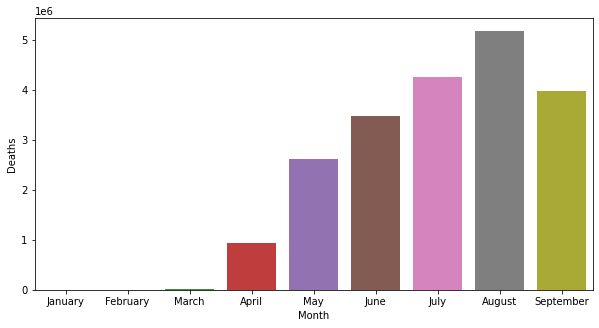

In [ ]:
plt.subplots(figsize=(10, 5))
sns.barplot(x='Month',y='Deaths',data=deaths_by_month.sort_values('Date'))


In [ ]:
# deaths_per_province[['Deaths']].diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
# plt.xlabel('Date', fontsize=20);

A hypothesis is being tested to know wheather a correlation exists between the population of particular province state to the deaths occured in the same.

Correlation of the dataframe and the co-variance matrix has been presented below.

From the Scatter Plot, it can be observed to have an approximately straight line ahead depicting the linear relationship with few outliers. 
Hence, it can be stated that the deaths has occured more in the province state where population is more.

In [ ]:
correlation_df = pd.merge(deaths_per_province, population_per_province, left_on = ['Province_State'], right_on=['Province_State'] ,how='left' )

In [ ]:
np.corrcoef(correlation_df.Population, correlation_df.Deaths)

array([[1.        , 0.55088671],
       [0.55088671, 1.        ]])

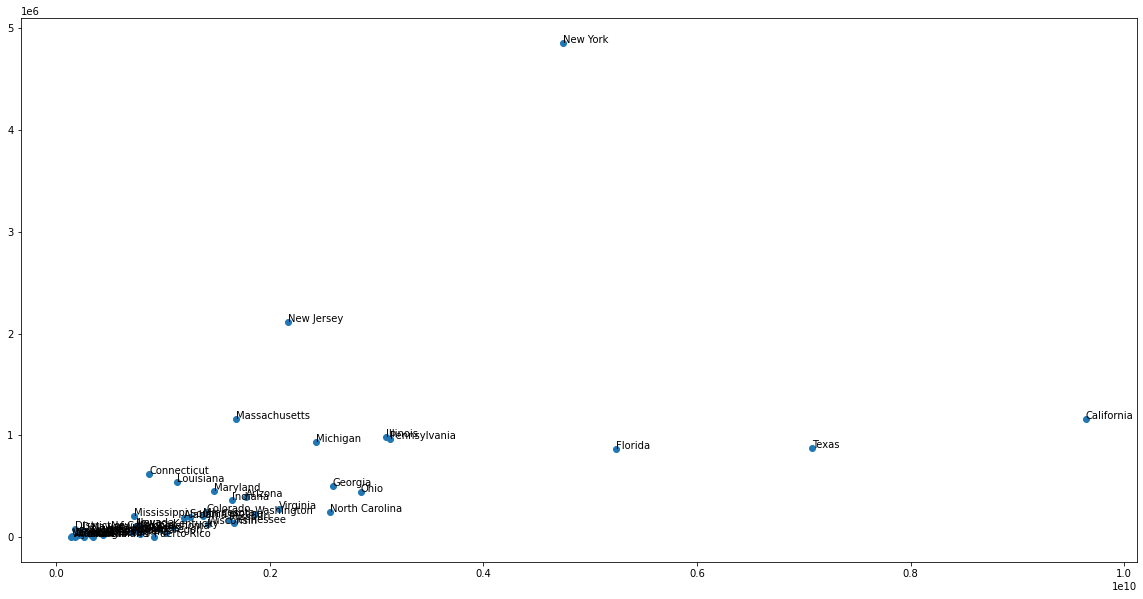

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(correlation_df.Population, correlation_df.Deaths)

for i, txt in enumerate(correlation_df.Province_State):
    ax.annotate(txt, (correlation_df.Population[i], correlation_df.Deaths[i]))

Plotting Heat map showing the correlation between population and deaths.

Text(0.5, 1.0, 'Correlation')

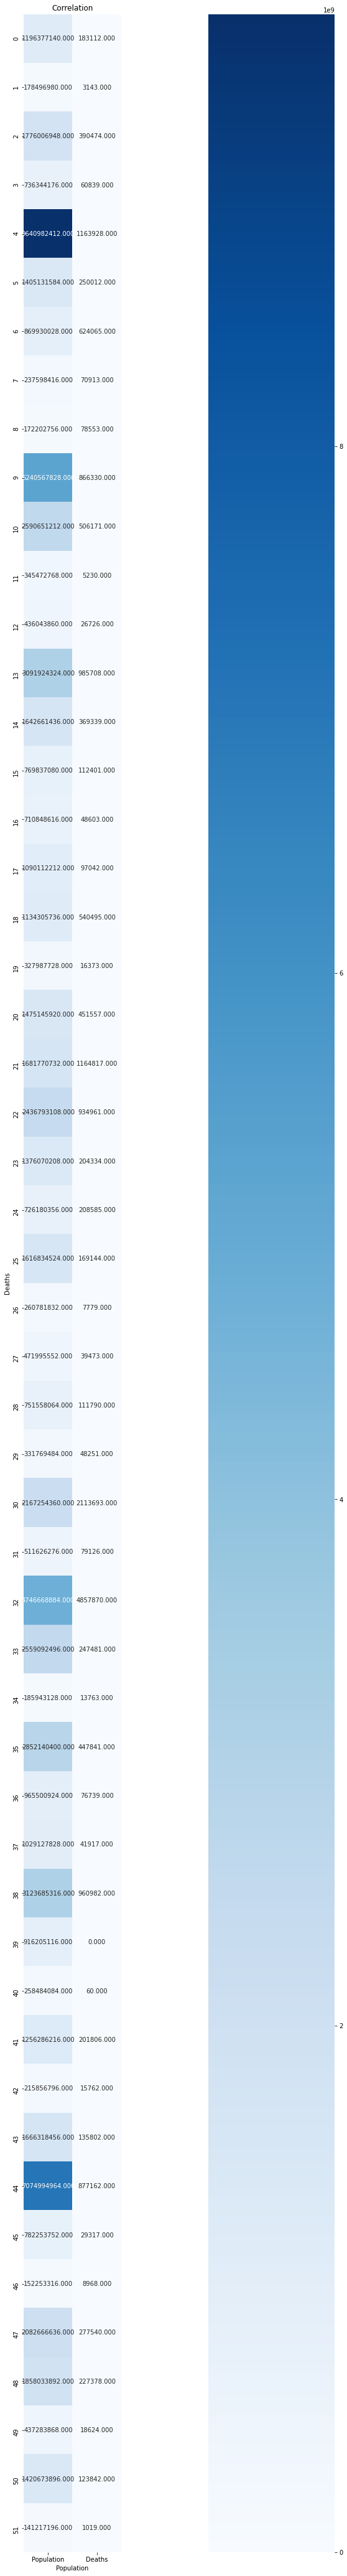

In [ ]:
plt.subplots(figsize=(50,75))
sns.heatmap(correlation_df[['Population','Deaths']], annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Deaths')
plt.xlabel('Population')
plt.title('Correlation')

Resampling the dataframe to determine the average number of deaths per week

In [ ]:
# Resample to weekly mean frequency
deaths_weekly_mean = deaths_df_long.set_index('Date').resample('W').mean()
deaths_weekly_mean.head()

,UID,Fedaral_no,Lat,Long_,Population,Deaths
Date,,,,,,
2020-01-26,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-02-02,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-02-09,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-02-16,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-02-23,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0


Resampling the dataframe to determine the average number of deaths everyday.



In [ ]:
# Resample to daily mean frequency
deaths_daily_mean = deaths_df_long.set_index('Date').resample('D').mean()
deaths_daily_mean.head()

,UID,Fedaral_no,Lat,Long_,Population,Deaths
Date,,,,,,
2020-01-22,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-01-23,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-01-24,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-01-25,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0
2020-01-26,8.352287e+07,31393.60528,37.96614,-91.662664,103223.658802,0.0


Plotting the time series line graph of mean deaths per week and mean deaths everyday. From the below graph, it can be determined the average death increases over the time period.

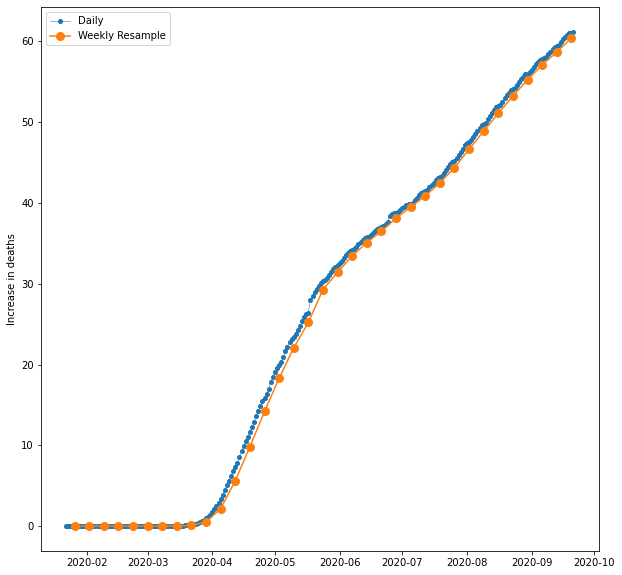

In [ ]:
#plt.subplots(figsize=(15,15))
# Start and end of the date range to extract
start, end = '2020-01-22', '2020-09-21'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(deaths_daily_mean.loc[start:end, 'Deaths'],
marker='o',markersize = 4, linestyle='-', linewidth=0.5, label='Daily')
ax.plot(deaths_weekly_mean.loc[start:end, 'Deaths'],
marker='o', markersize=8, linestyle='-', label='Weekly Resample')
#ax.plot(deaths_rolling_mean.loc[start:end, 'Deaths'],
#marker='.', linestyle='-', label='Rolling')
ax.set_ylabel('Increase in deaths')
ax.legend();

In [ ]:
# Resample to weekly sum frequency
deaths_weekly_sum = deaths_df_long.set_index('Date').resample('W').sum()
deaths_weekly_sum.head()

,UID,Fedaral_no,Lat,Long_,Population,Deaths
Date,,,,,,
2020-01-26,1345135787060,505437045.0,611444.678579,-1.476227e+06,1662417025,0
2020-02-02,1883190101884,707611863.0,856022.550011,-2.066718e+06,2327383835,0
2020-02-09,1883190101884,707611863.0,856022.550011,-2.066718e+06,2327383835,0
2020-02-16,1883190101884,707611863.0,856022.550011,-2.066718e+06,2327383835,0
2020-02-23,1883190101884,707611863.0,856022.550011,-2.066718e+06,2327383835,0


In [ ]:
# Resample to daily sum frequency
deaths_daily_sum = deaths_df_long.set_index('Date').resample('D').sum()
deaths_daily_sum.head()

,UID,Fedaral_no,Lat,Long_,Population,Deaths
Date,,,,,,
2020-01-22,269027157412,101087409.0,122288.935716,-295245.441972,332483405,0
2020-01-23,269027157412,101087409.0,122288.935716,-295245.441972,332483405,0
2020-01-24,269027157412,101087409.0,122288.935716,-295245.441972,332483405,0
2020-01-25,269027157412,101087409.0,122288.935716,-295245.441972,332483405,0
2020-01-26,269027157412,101087409.0,122288.935716,-295245.441972,332483405,0


Plotting the time series line graph of total deaths per week and total deaths everyday. From the below graph, it can be determined the average death increases over the time period.

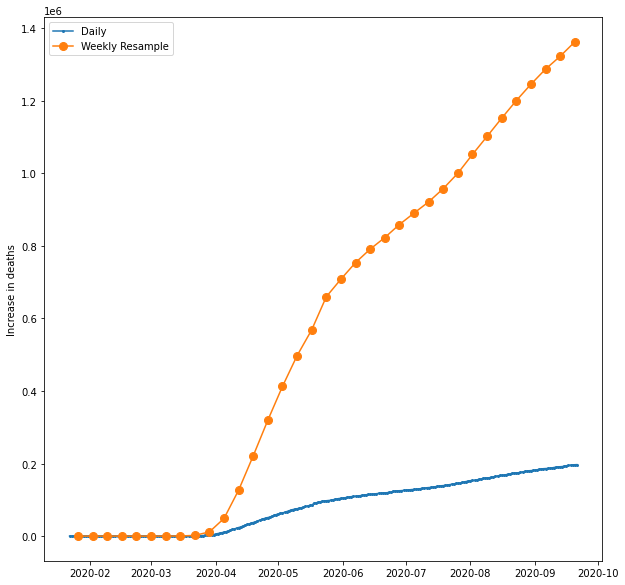

In [ ]:
#plt.subplots(figsize=(15,15))
# Start and end of the date range to extract
start, end = '2020-01-22', '2020-09-21'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(deaths_daily_sum.loc[start:end, 'Deaths'],
marker='.',markersize = 4, linestyle='-', linewidth=None, label='Daily')
ax.plot(deaths_weekly_sum.loc[start:end, 'Deaths'],
marker='o', markersize=8, linestyle='-', label='Weekly Resample')
#ax.plot(deaths_rolling_mean.loc[start:end, 'Deaths'],
#marker='.', linestyle='-', label='Rolling')
ax.set_ylabel('Increase in deaths')
ax.legend();

Determining the increase of deaths occoured in the next month compared to the previous month

In [ ]:
# Monthly Increase in deaths
deaths_by_month['Deaths'] - deaths_by_month['Deaths'].shift(1)

0          NaN
1          1.0
2      21881.0
3     911553.0
4    1689549.0
5     855372.0
6     786196.0
7     922651.0
8   -1198776.0
Name: Deaths, dtype: float64

Plotting the Pie plot to know which county has encountered the most deaths. From the plot, it can be seen that in 'New York' more deaths has occured.

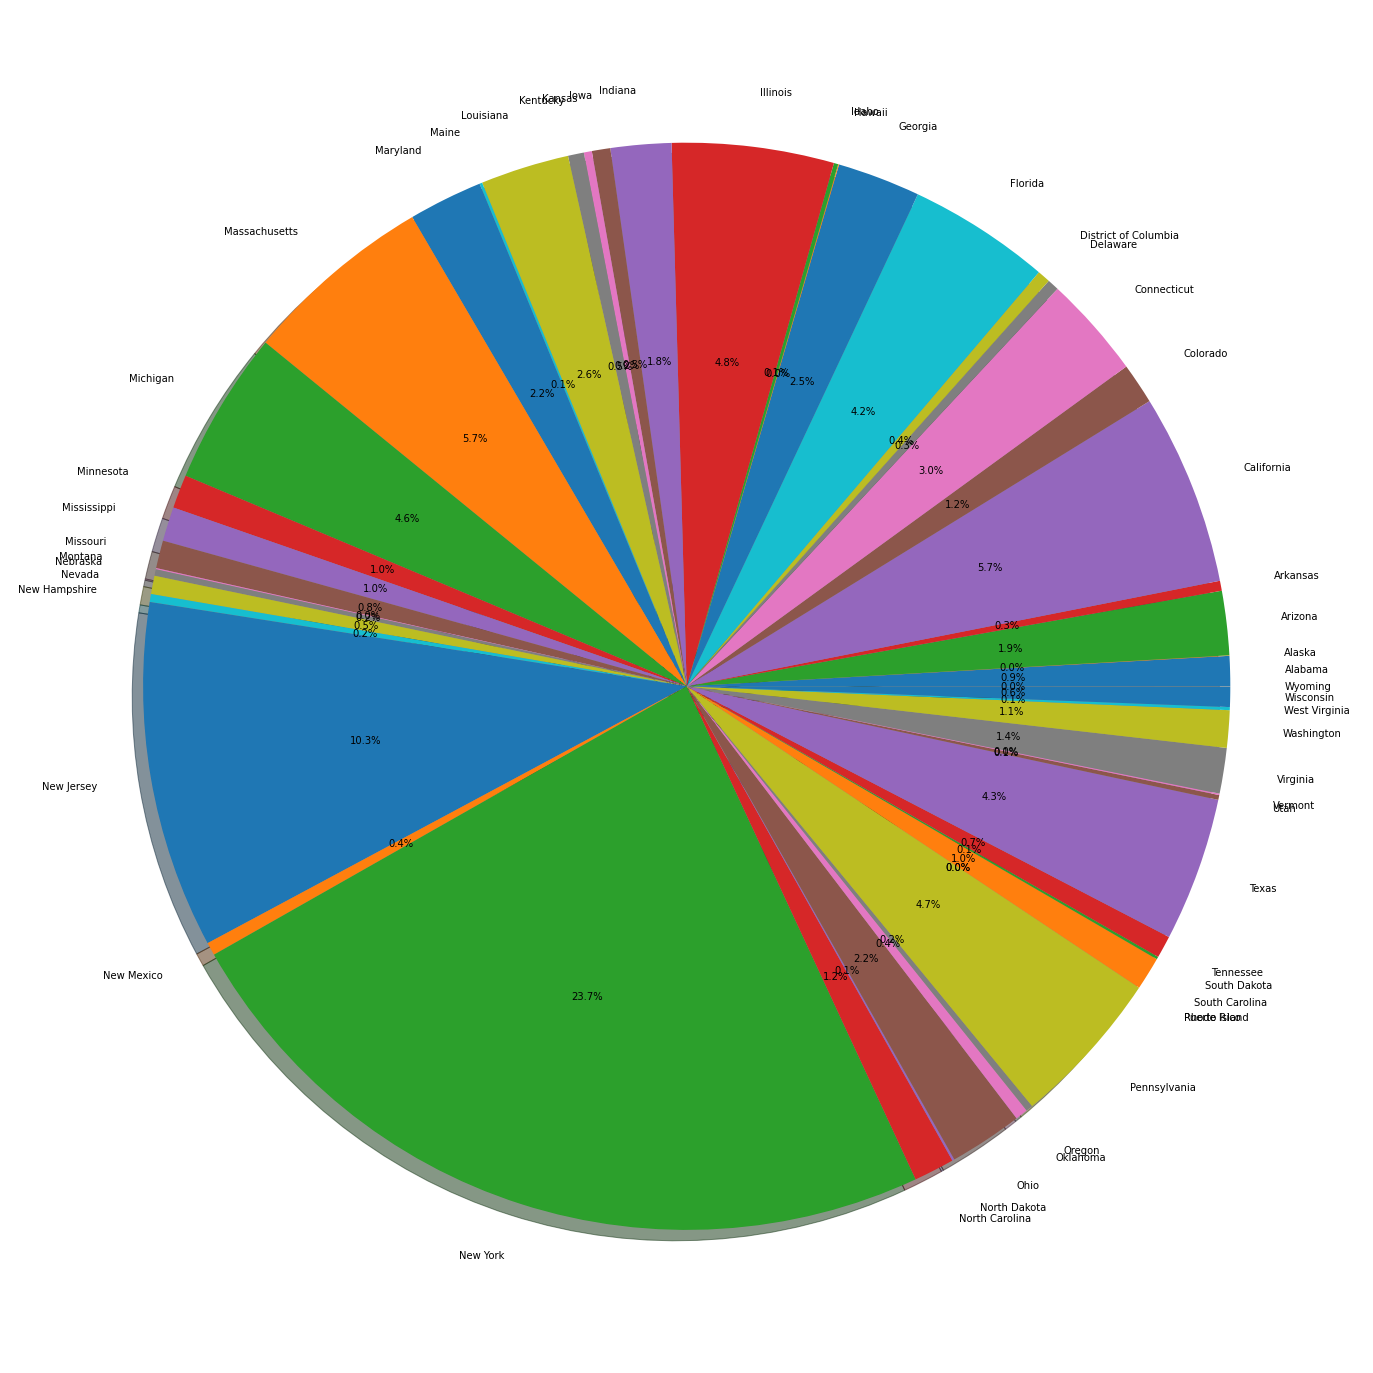

In [ ]:
plt.subplots(figsize=(25,25))
plt.pie(deaths_per_province.Deaths, labels=deaths_per_province.Province_State , shadow=True, startangle=0, autopct='%1.1f%%')
plt.show()


From the Data Cleaning and Data exploring, it could be noted that initially dataframe was not ready to use as it had 250 columns, transposing the dataframe gave 10 columns.

While cleaning the dataset, few issues encountered were missing values, wrong datatype and data of Cruise ships and islands in United states where also included.

Exploring of dataset was performed by aggregating the sum of deaths per province, population per province.
Analyzing the deaths weekly and monthly and every state province wise.
It was observed that New york had the most deaths, followed by New jersy, California.
